# Preprocessing

In [65]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# heart_df = pd.read_csv("./Resources/heart.csv")
# heart_df.head()

In [55]:
# Determine the number of unique values in each column.
heart_df.nunique()

Age                    50
Sex                     2
ChestPainType           4
RestingBP              67
Cholesterol           222
FastingBS               2
RestingECG              3
MaxHR                 119
ExerciseAngina          2
Oldpeak                53
ST_Slope                3
HeartDisease            2
Sex_num                 2
ChestPainType_num       4
RestingECG_num          3
ExerciseAngina_num      2
ST_Slope_num            3
dtype: int64

In [44]:
columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

for column in columns:
    values = np.array(heart_df[column].unique())
    
    heart_df[f'{column}_num'] = heart_df.apply(lambda row: np.where(values == row[column])[0][0],axis=1)
    
heart_df.head()
    

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_num,ChestPainType_num,RestingECG_num,ExerciseAngina_num,ST_Slope_num
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,0,0,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,1,0,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,0,1,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,2,0,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,0,0


In [45]:
numeric_df=heart_df.drop(columns=columns,axis=1)
numeric_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_num,ChestPainType_num,RestingECG_num,ExerciseAngina_num,ST_Slope_num
0,40,140,289,0,172,0.0,0,0,0,0,0,0
1,49,160,180,0,156,1.0,1,1,1,0,0,1
2,37,130,283,0,98,0.0,0,0,0,1,0,0
3,48,138,214,0,108,1.5,1,1,2,0,1,1
4,54,150,195,0,122,0.0,0,0,1,0,0,0


In [ ]:
#################### START CELLS BELOW #########################

In [66]:
# START - Load Integer dataset: heart_integer_v01.csv
data2 = pd.read_csv('../proj4_mike/static_[null]/heart_integer_v01.csv')

data2.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_m,Sex_f,ChestPainType_ata,...,ChestPainType_asy,ChestPainType_ta,RestingECG_normal,RestingECG_st,RestingECG_lvh,ExerciseAngina_n,ExerciseAngina_y,ST_Slope_up,ST_Slope_flat,ST_Slope_down
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
1,49,160,180,0,156,1.0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
3,48,138,214,0,108,1.5,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
5,39,120,339,0,170,0.0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
6,45,130,237,0,170,0.0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
7,54,110,208,0,142,0.0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
8,37,140,207,0,130,1.5,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
9,48,120,284,0,120,0.0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0


In [67]:
# Drop specified columns // DONT NEED COLUMNS b/c Binary Output: M/F
columns_to_drop = ['Sex_f', 'ExerciseAngina_n']
data2 = data2.drop(columns=columns_to_drop)

# Verify the changes
print(data2.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_m', 'ChestPainType_ata', 'ChestPainType_nap',
       'ChestPainType_asy', 'ChestPainType_ta', 'RestingECG_normal',
       'RestingECG_st', 'RestingECG_lvh', 'ExerciseAngina_y', 'ST_Slope_up',
       'ST_Slope_flat', 'ST_Slope_down'],
      dtype='object')


In [68]:
# rename DataFrame variable
numeric_df = data2.copy()

In [69]:
# Split our preprocessed data into our features and target arrays
y=numeric_df['HeartDisease']
X=numeric_df.drop(columns='HeartDisease',axis=1)

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=50)

In [15]:
# Create a StandardScaler instances
## scaler = StandardScaler()

# Fit the StandardScaler
## X_scaler = scaler.fit(X_train)

# Scale the data
## X_train_scaled = X_scaler.transform(X_train)
## X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Import MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
# scaler = MinMaxScaler()

# Fit the MinMaxScaler
# X_scaler = scaler.fit(X_train)

# Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [70]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

input_features_cnt = X.shape[1]
hidden_nodes_layer1=30
hidden_nodes_layer2=10


# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=input_features_cnt,activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation='relu'))



# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                570       
                                                                 
 dense_13 (Dense)            (None, 10)                310       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 891 (3.48 KB)
Trainable params: 891 (3.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# Compile the model
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
# Train the model
fit_model=nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 3.1035 - accuracy: 0.3299
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 1.1319 - accuracy: 0.5073
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7392 - accuracy: 0.6250
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7311
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.7471
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7674
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7674
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7849
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.7529
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7762
Epoch 11/

22/22 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8576
Epoch 84/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8590
Epoch 85/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8503
Epoch 86/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8517
Epoch 87/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8619
Epoch 88/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8503
Epoch 89/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8634
Epoch 90/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8605
Epoch 91/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8561
Epoch 92/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.8619
Epoch 93/100


In [73]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.3028 - accuracy: 0.8652 - 103ms/epoch - 13ms/step
Loss: 0.3027579188346863, Accuracy: 0.865217387676239


In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("----------------------------------------------------------")

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

print("----------------------------------------------------------")

# Make predictions on the testing data
y_pred = nn.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Create the classification report
class_report = classification_report(y_test, y_pred_classes)

print("Classification Report:")
print(class_report)

print("----------------------------------------------------------")

# Make predictions on the testing data
y_pred = nn.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

print("----------------------------------------------------------")

----------------------------------------------------------
8/8 - 0s - loss: 0.3028 - accuracy: 0.8652 - 30ms/epoch - 4ms/step
Loss: 0.3027579188346863, Accuracy: 0.865217387676239
----------------------------------------------------------
8/8 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       109
           1       0.84      0.92      0.88       121

    accuracy                           0.87       230
   macro avg       0.87      0.86      0.86       230
weighted avg       0.87      0.87      0.86       230

----------------------------------------------------------
8/8 [==============================] - 0s 1ms/step
Confusion Matrix:
[[ 88  21]
 [ 10 111]]
----------------------------------------------------------


In [39]:
# Export our model to HDF5 file
nn.save('TrainedModel.h5')

/Users/michaelstrati/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


HeartDisease
0    410
1    508
Name: HeartDisease, dtype: int64


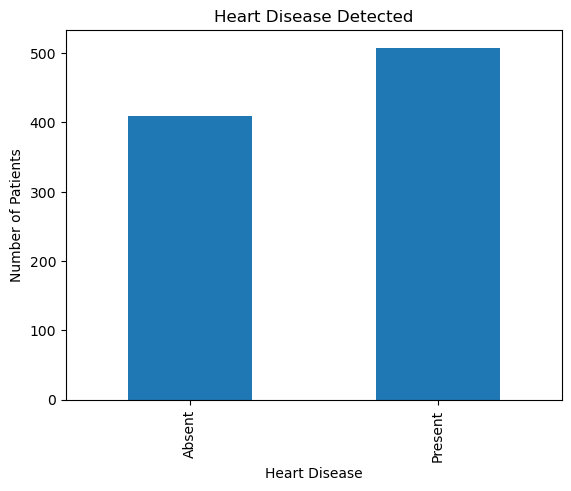

In [23]:
plot_df=heart_df.groupby('HeartDisease')["HeartDisease"].count()

print(plot_df)
img=plot_df.plot(kind='bar')
plt.title("Heart Disease Detected")
plt.xlabel("Heart Disease")
plt.ylabel("Number of Patients")
img.set_xticklabels(['Absent','Present'])
plt.show()